In [13]:
import numpy as np
import scipy as sp
import h5py
import matplotlib.pyplot as plt
# from freeqdsk import geqdsk

In [66]:
with h5py.File('../Testing/beta1.h5','r') as h5f:
    print(h5f.keys())
    FF = h5f['/FluxFunctions']
    print(FF.keys())
    B = h5f['/Boundaries']
    print(B.keys())
    S = h5f['/Scalars']
    print(S.keys())
    #print(FF["PsiX"][()])
    #print(FF["psi"][()])
    print(h5f['Scalars/PsiMagX'][()])
    print(h5f["Scalars/PsiLCFS"][()])
    print(h5f["Scalars/PsiFCFS"][()])
    print(h5f["Scalars/R0"][()])
    print(h5f["Scalars/B0"][()])

<KeysViewHDF5 ['Boundaries', 'FluxFunctions', 'Grid', 'Scalars']>
<KeysViewHDF5 ['B2Ave', 'BBetaMax', 'BMax', 'BetaAve', 'BetaMax', 'G2prime', 'Gpsi', 'JAve', 'PsiNorm', 'RBMax', 'RBetaMax', 'Shear', 'Vprime', 'Vpsi', 'Well', 'ZBMax', 'ZBetaMax', 'pprime', 'ppsi', 'psi', 'qpsi']>
<KeysViewHDF5 ['FCFS', 'LCFS', 'ilim', 'olim']>
<KeysViewHDF5 ['B0', 'Ip', 'PsiFCFS', 'PsiLCFS', 'PsiMagX', 'R0', 'RMagX', 'Z0', 'ZMagX']>
-1.3094682667651323
-0.19495087482545814
-0.5387912266347198
0.35
0.0001


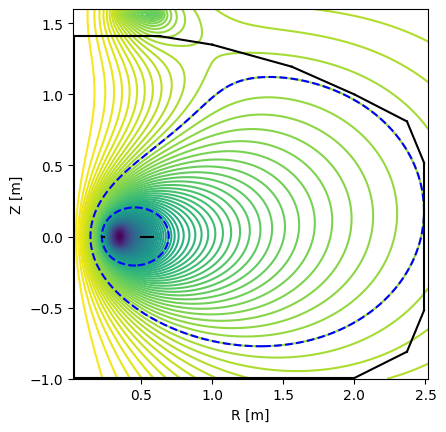

In [51]:
def plot_h5eq(h5eq):
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots()
    ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],h5eq['Grid']['Psi'],100)
    ax.set_xlabel(f'R [{h5eq["Grid"]["R"].attrs["UNITS"].decode()}]')
    ax.set_ylabel(f'Z [{h5eq["Grid"]["Z"].attrs["UNITS"].decode()}]')
    ax.set_aspect('equal')
    ax.plot(h5eq['Boundaries']['LCFS'][:,0],h5eq['Boundaries']['LCFS'][:,1],'b--')
    ax.plot(h5eq["Boundaries"]["FCFS"][:, 0], h5eq["Boundaries"]["FCFS"][:, 1], "b--")
    ilim = h5eq["Boundaries"]["ilim"]
    olim = h5eq["Boundaries"]["olim"]
    for lim in [ilim, olim]:
        for i in range(lim.shape[0]):
            ax.plot(lim[i, :, 0], lim[i, :, 1], "k-")


with h5py.File('../Testing/beta1.h5','r') as h5f:
    plot_h5eq(h5f)

<HDF5 dataset "PsiNorm": shape (513,), type "<f8">
<HDF5 dataset "pprime": shape (513,), type "<f8">


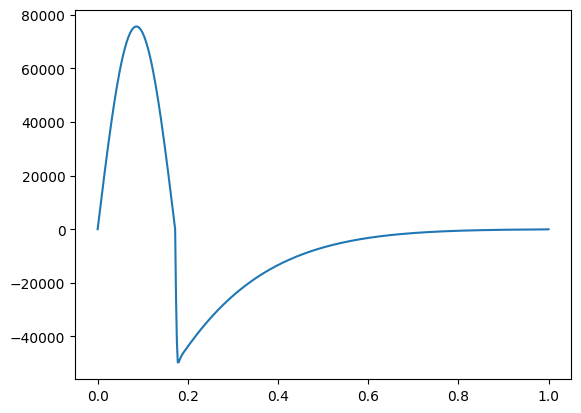

In [53]:
def plot_h5eq_ff(h5eq):
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots()
    plt.plot(h5eq['FluxFunctions']['PsiNorm'][()],h5eq['FluxFunctions']['pprime'][()],label='pprime')


with h5py.File('../Testing/beta1.h5','r') as h5f:
    #print(h5f['FluxFunctions']['PsiNorm'])
    #print(h5f["FluxFunctions"]["pprime"])
    plot_h5eq_ff(h5f)

In [58]:
from importlib import reload
import h5togeqdsk as hdf2g
reload(hdf2g)

with h5py.File('../Testing/beta1.h5','r') as h5f:
    gdata, oname = hdf2g.dipoleq_to_geqdsk(h5f)
    ofile = f"{oname}.geqdsk"
    with open(ofile, 'w') as fh:
        geqdsk.write(gdata, fh, label=oname)
        print(f"{oname:s} written to {ofile}")
    

# beta1 written to beta1.geqdsk


In [59]:
with h5py.File('../Testing/Tahi_B1.h5','r') as h5f:
    print(h5f.keys())
    FF = h5f['/FluxFunctions']
    print(FF.keys())
    B = h5f['/Boundaries']
    print(B.keys())
    S = h5f['/Scalars']
    print(S.keys())
    G = h5f['/Grid']
    print(G.keys())


<KeysViewHDF5 ['Boundaries', 'FluxFunctions', 'Grid', 'Scalars']>
<KeysViewHDF5 ['B2Ave', 'BBetaMax', 'BMax', 'BetaAve', 'BetaMax', 'G2prime', 'Gpsi', 'JAve', 'PsiNorm', 'Qpsi', 'RBMax', 'RBetaMax', 'Shear', 'Vol', 'Vprime', 'Well', 'ZBMax', 'ZBetaMax', 'pprime', 'pres', 'psi']>
<KeysViewHDF5 ['FCFS', 'LCFS', 'ilim', 'olim']>
<KeysViewHDF5 ['B0', 'Ip', 'PsiFCFS', 'PsiLCFS', 'PsiMagX', 'R0', 'RMagX', 'Z0', 'ZMagX']>
<KeysViewHDF5 ['B2', 'Beta', 'Bp_R', 'Bp_Z', 'Current', 'Pressure', 'Psi', 'R', 'Residuals', 'ToroidalFlux', 'Z']>


/var/folders/g_/j5z2xwcj4g715j7pxkdzyzf40000gn/T/ipykernel_38335/1655040108.py:10: UserWarning: The following kwargs were not used by contour: 'lindwidths'
  ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],h5eq['Grid']['Psi'],vmin=h5eq['Scalars']['PsiFCFS'][()],


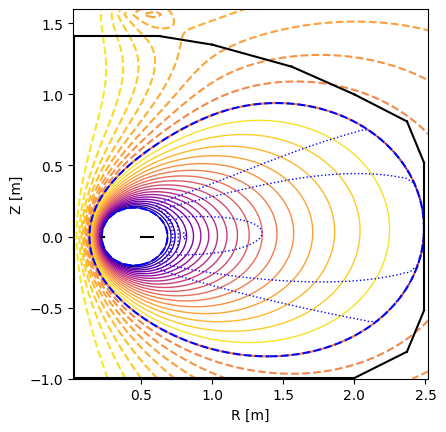

In [60]:
from pyparsing import line

def plot_h5eq(h5eq):
    import matplotlib.pyplot as plt
    import numpy as np
    fig,ax = plt.subplots()
    ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],h5eq['Grid']['Psi'],vmin=h5eq['Scalars']['PsiFCFS'][()],
               levels=np.linspace(h5eq['Scalars']['PsiFCFS'][()],h5eq['Scalars']['PsiLCFS'][()],20),
               cmap = 'plasma', linewidths=1)
    ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],h5eq['Grid']['Psi'],vmin=h5eq['Scalars']['PsiFCFS'][()],
               levels=np.linspace(h5eq['Scalars']['PsiLCFS'][()],0,10),
               cmap='plasma',linestyles='dashed',lindwidths=.5)
    
    ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],h5eq['Grid']['Beta'],levels=[.1,.2,.5,1,2,5],
               colors='b',linestyles='dotted', linewidths=1)
    ax.set_xlabel(f'R [{h5eq["Grid"]["R"].attrs["UNITS"].decode()}]')
    ax.set_ylabel(f'Z [{h5eq["Grid"]["Z"].attrs["UNITS"].decode()}]')
    ax.set_aspect('equal')
    ax.plot(h5eq['Boundaries']['LCFS'][:,0],h5eq['Boundaries']['LCFS'][:,1],'b--')
    ax.plot(h5eq["Boundaries"]["FCFS"][:, 0], h5eq["Boundaries"]["FCFS"][:, 1], "b--")
    ilim = h5eq["Boundaries"]["ilim"]
    olim = h5eq["Boundaries"]["olim"]
    for lim in [ilim, olim]:
        for i in range(lim.shape[0]):
            ax.plot(lim[i, :, 0], lim[i, :, 1], "k-")


with h5py.File('../Testing/Tahi_B1.h5','r') as h5f:
    plot_h5eq(h5f)

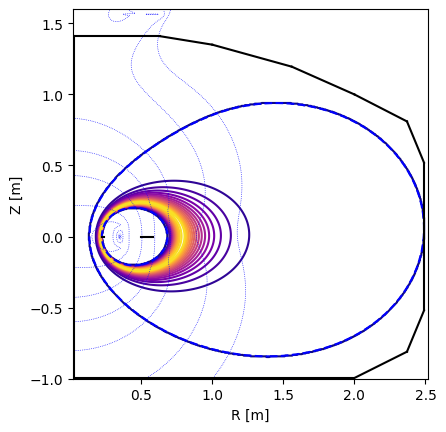

In [62]:
def plot_h5eq(h5eq):
    import matplotlib.pyplot as plt
    import numpy as np
    fig,ax = plt.subplots()
#    ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],h5eq['Grid']['Psi'],20)
#    ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],h5eq['Grid']['Current'], cmap='plasma',levels=30)
    ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],h5eq['Grid']['Pressure'], cmap='plasma', levels=20)
    ax.contour(h5eq['Grid']['R'],h5eq['Grid']['Z'],np.sqrt(h5eq['Grid']['B2']), 
               levels=[.1,.2,.5,1,2,5,10], linestyles='dotted', linewidths=.5, colors='b')
    ax.set_xlabel(f'R [{h5eq["Grid"]["R"].attrs["UNITS"].decode()}]')
    ax.set_ylabel(f'Z [{h5eq["Grid"]["Z"].attrs["UNITS"].decode()}]')
    ax.set_aspect('equal')
    ax.plot(h5eq['Boundaries']['LCFS'][:,0],h5eq['Boundaries']['LCFS'][:,1],'b--')
    ax.plot(h5eq["Boundaries"]["FCFS"][:, 0], h5eq["Boundaries"]["FCFS"][:, 1], "b--")
    ilim = h5eq["Boundaries"]["ilim"]
    olim = h5eq["Boundaries"]["olim"]
    for lim in [ilim, olim]:
        for i in range(lim.shape[0]):
            ax.plot(lim[i, :, 0], lim[i, :, 1], "k-")


with h5py.File('../Testing/Tahi_B1.h5','r') as h5f:
    plot_h5eq(h5f)

(513,) (513,) (513,)
[-1.41073237]
[938.68529131 938.68529131 469.21805505]
[    0.          6125.6034588  12244.70428993]
[1.98793661e+17 6.58369446e+17 1.61616429e+18] 1e+20 [1.35768184e+18 1.33594912e+18 1.32736688e+18]
[23.76817513 53.02013392 96.77238223] 1534.8507220508307 [86.10746589 85.18152062 84.81449828]


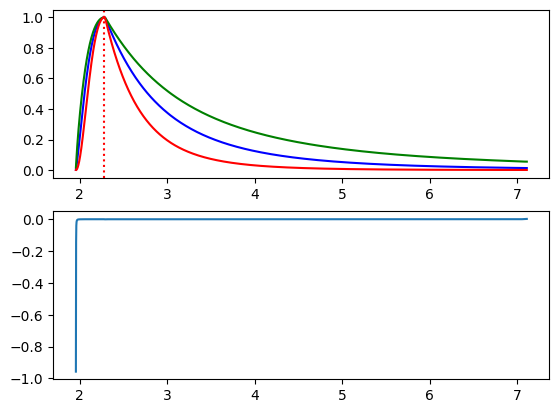

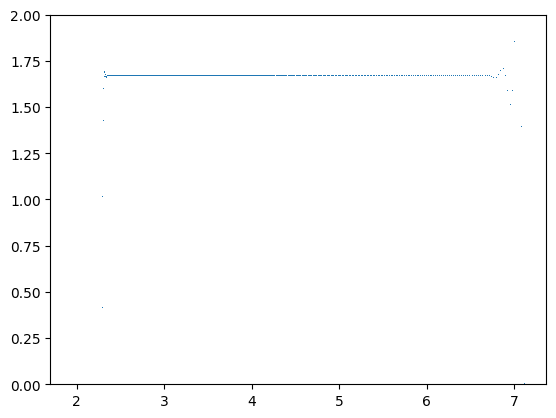

In [69]:
from matplotlib import lines


def kinetic_profiles(p, pp, V, eta):
    d = pp / p  / V 

def plot_d(h5eq):
    import matplotlib.pyplot as plt
    import numpy as np
    fig,ax = plt.subplots()
    FF = h5eq['FluxFunctions']
    L = FF['RBetaMax']/h5eq['Scalars']['RMagX'][()]
    p = FF['ppsi'][:]
    p[0] = p[-1] # don't have zero edge pressure
    psi = FF['psi'][:]
    d2Vdpsi = np.gradient(FF['Vprime'][:],FF['psi'][:])
    dlnp = FF['pprime'][:]/p
    dlnp[0] = dlnp[1]
    dlnV = d2Vdpsi/FF['Vprime'][:]
    d = -dlnp/dlnV
    ax.plot(L, d, ',')
    plt.ylim(0,2)
    plt.show()

def profiles(h5eq):
    import matplotlib.pyplot as plt
    import numpy as np
    fig,axes = plt.subplots(nrows=2)
    ax = axes[0]
    FF = h5eq['FluxFunctions']
    L = FF['RBetaMax']/h5eq['Scalars']['RMagX'][()]
    p = FF['ppsi'][:]
    p[0] = p[-1] # don't have zero edge pressure
    psi = FF['psi'][:]
    d2Vdpsi = np.gradient(FF['Vprime'][:],FF['psi'][:])
    dlnp = FF['pprime'][:]/p
    dlnp[0] = dlnp[1]
    dlnV = d2Vdpsi/FF['Vprime'][:]
    d = -dlnp/dlnV
    
    print(psi.shape, dlnp.shape, d.shape)
    peaks, _ = sp.signal.find_peaks(p)
    print(psi[peaks])
    peak = peaks[0]
    
    # d = dlnp/dlnV
    # eta = dlnT/dlnn
    # dlnp = dlnT + dlnn 
    # dlnn = dlnp - dlnT = dlnp - eta * dlnn
    # dlnn = dlnp / (1 + eta)
    # dlnT = eta * dlnn = eta * dlnp / (1 + eta)
    eta = .67
    npeak = 1e20
    eV = 1.602e-19
    dlnn = dlnp / (1 + eta)
    dlnT = eta * dlnn
    n = np.exp(sp.integrate.cumulative_trapezoid(dlnn,psi,initial=0))
    T = np.exp(sp.integrate.cumulative_trapezoid(dlnT,psi,initial=0))
    n = n * npeak / n[peak]
    T = T * p[peak] / (npeak * T[peak]) / eV # in eV
    
    print(dlnp[0:3])
    print(FF['pprime'][0:3])
    print(n[:3], n[peak], n[-3:])
    print(T[:3], T[peak], T[-3:])
    
    #ax.plot(L,h5eq['FluxFunctions']['Vprime'][()])
    #ax.plot(L,h5eq['FluxFunctions']['ppsi'][()])
    #ax.plot(L,-FF['pprime'][:]/FF['ppsi'][:]/FF['Vprime'][:])
    #ax.plot(L, d, ',')
    ax.plot(L, n/n[peak], color='b', label='n')
    ax.plot(L, T/T[peak], color='g', label='T')
    ax.plot(L, p/p[peak], color='r', label='p')
    ax.axvline(L[peaks],color='r',linestyle='dotted')
    axes[1].plot(L, (n*T*eV-p)/p, label='error')
    # plt.xlim(2.5,7.5)
    plt.show()
    
with h5py.File('../Testing/Tahi_B1.h5','r') as h5f:
    profiles(h5f)
    plot_d(h5f)